# Import libraries and read images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
# Read left and right image, convert to grayscale
left = cv2.imread("left.png", 0)
right = cv2.imread("right.png", 0)


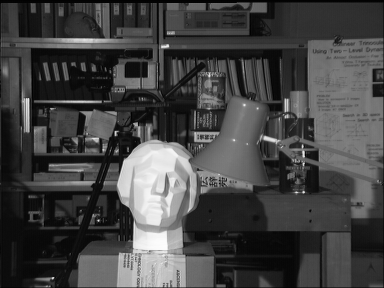

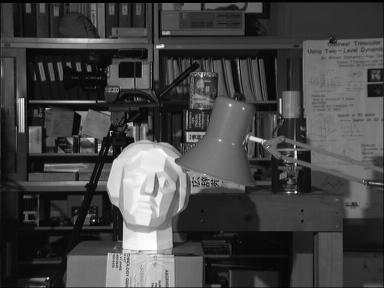

In [6]:
cv2_imshow(left)
cv2_imshow(right)

# Main application

## Define cost function

In [35]:
# L1 distance
def l1_distance(x,y):
    return abs (x - y)

# L2 distance
def l2_distance(x,y):
    return (x - y) ** 2

# Cosine similarity
def cosine_simi (x, y):
  numerator = np.dot(x, y)
  denominator = np.linalg.norm(x) * np.linalg.norm(y)

  return numerator / denominator



## Depth reconstruction

### Pixel-wise matching

In [12]:
def pixel_wise_matching (right, left, cost_function, disparity_range= 16):
  """
  cost_function: l1 to use l1 distance, l2 to use l2 distance
  disparity_range:
  """

  # Convert image type
  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  # Create blank disparity map
  depth = np.zeros((height, width), np.uint8)
  scale = 16
  max_value = 255

  for h in range (height):
    for w in range (width):
      # Find d where cost has minimum value
      costs = []
      for d in range (disparity_range):
        if w- d < 0:
          cost = max_value
        else:
          if cost_function == "l1":
            cost = l1_distance(left[h,w], right[h, w-d])
          elif cost_function == "l2":
            cost = l2_distance(left[h,w], right[h, w-d])
        costs.append(cost)

      min_cost = min(costs)
      min_cost_idx = costs.index(min_cost) #disparity

      depth[h, w] = min_cost_idx * scale
  return depth

In [14]:
depth_l1 = pixel_wise_matching(right, left, cost_function= "l1")

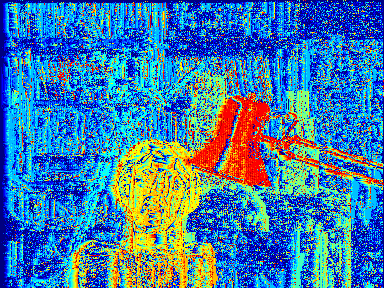

In [15]:
depth_l1 = cv2.applyColorMap(depth_l1, cv2.COLORMAP_JET)
cv2_imshow(depth_l1)


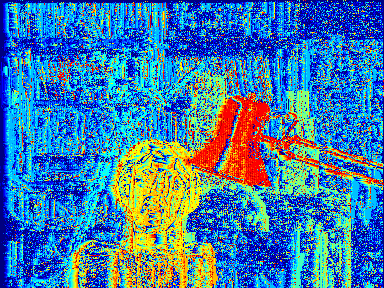

In [16]:
depth_l2 = pixel_wise_matching(right, left, cost_function= "l2")
depth_l2 = cv2.applyColorMap(depth_l2, cv2.COLORMAP_JET)
cv2_imshow(depth_l2)


### Window-based matching


In [38]:
def window_based_matching (right, left, cost_function, scale = 16, kernel_size= 3, disparity_range= 16):
  """
  cost_function: l1 to use l1 distance, l2 to use l2 distance, cosine to use cosine similarity
  disparity_range:
  """

  # Convert image type
  left = left.astype(np.float32)
  right = right.astype(np.float32)

  height, width = left.shape[:2]

  # Create blank disparity map
  depth = np.zeros((height, width), np.uint8)
  max_value = 255 * 9

  kernel_half = int((kernel_size - 1) / 2)

  for h in range (kernel_half, height - kernel_half):
    for w in range (kernel_half, width - kernel_half):

      # Find d where cost has minimum value
      costs = []
      disparity = 0
      cost_min = 999999

      for d in range (disparity_range):
        total = 0
        value = 0
        for v in range (-kernel_half, kernel_half +1):
          for u in range (-kernel_half, kernel_half + 1):
            value = max_value
            if (w + u - d) >= 0:
                if cost_function == "l1":
                  value = l1_distance(int(left[h + v, w + u]),
                                     int(right[h + v, (w + u) - d]))
                elif cost_function == "l2":
                    value = l2_distance(int(left[h + v, w + u]),
                                     int(right[h + v, (w + u) - d]))
                elif cost_function == "cosine":
                    value = cosine_simi(int(left[h + v, w + u]),
                                     int(right[h + v, (w + u) - d]))
            total += value
        if total < cost_min:
          cost_min = total
          disparity = d
      # Let depth at (h, w) = d (disparity)
      # Multiply by a scale factor for visualization purpose
      depth[h, w] = disparity * scale
  return depth

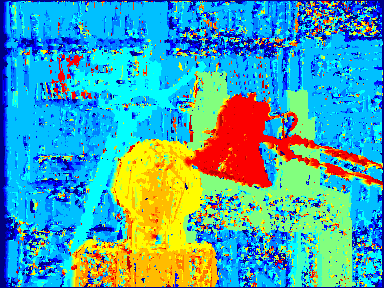

In [28]:
# l1 distance
depth_l1_wb = window_based_matching(right, left, cost_function= "l1")
depth_l1_wb = cv2.applyColorMap(depth_l1_wb, cv2.COLORMAP_JET)
cv2_imshow(depth_l1_wb)


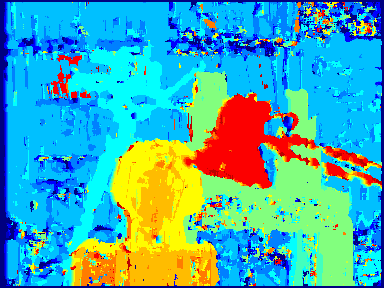

In [37]:
# Increase kernel size
depth_l1_wb_2 = window_based_matching(right, left, cost_function= "l1", kernel_size= 5)
depth_l1_wb_2 = cv2.applyColorMap(depth_l1_wb_2, cv2.COLORMAP_JET)
cv2_imshow(depth_l1_wb_2)


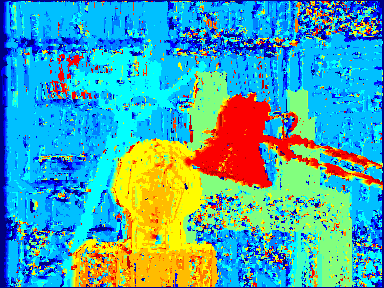

In [39]:
# l2 distance
depth_l2_wb = window_based_matching(right, left, cost_function= "l2")
depth_l2_wb = cv2.applyColorMap(depth_l2_wb, cv2.COLORMAP_JET)
cv2_imshow(depth_l2_wb)

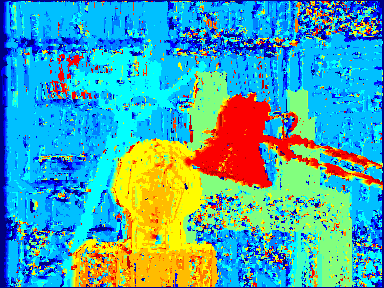

In [40]:
# Cosine similarity
depth_l2_wb = window_based_matching(right, left, cost_function= "l2")
depth_l2_wb = cv2.applyColorMap(depth_l2_wb, cv2.COLORMAP_JET)
cv2_imshow(depth_l2_wb)